In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
main = pd.read_csv('Family Income and Expenditure.csv')
income_annually = main.iloc[:, :2]
income_monthly=pd.DataFrame({
    'Monthly Income':(income_annually['Total Household Income']/12).astype(int),
    "Region":income_annually["Region"]
})

In [3]:
average_income = income_monthly.groupby("Region", as_index=False)["Monthly Income"].mean()
average_income["Monthly Income"] = average_income["Monthly Income"].astype(int)
average_income = average_income.sort_values(by='Monthly Income', ascending=False)


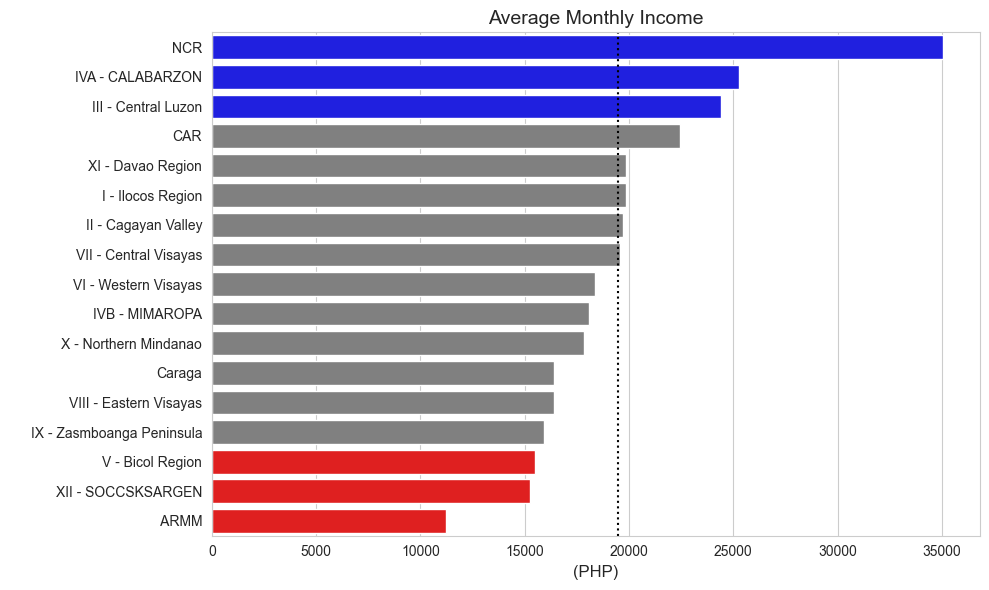

In [4]:
# Calculate overall average
overall_avg = average_income['Monthly Income'].mean()

# Assign color labels
color_labels = ['blue'] * 3 + ['gray'] * (len(average_income) - 6) + ['red'] * 3
average_income['Color'] = color_labels

# Plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    data=average_income,
    x='Monthly Income',
    y='Region',
    hue='Color',
    palette={'blue': 'blue', 'gray': 'gray', 'red': 'red'},
    dodge=False,
    legend=False
)

# Add dotted line for overall average
plt.axvline(overall_avg, color='black', linestyle='dotted', linewidth=1.5)

# Titles and labels
plt.title('Average Monthly Income', fontsize=14)
plt.xlabel('(PHP)', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


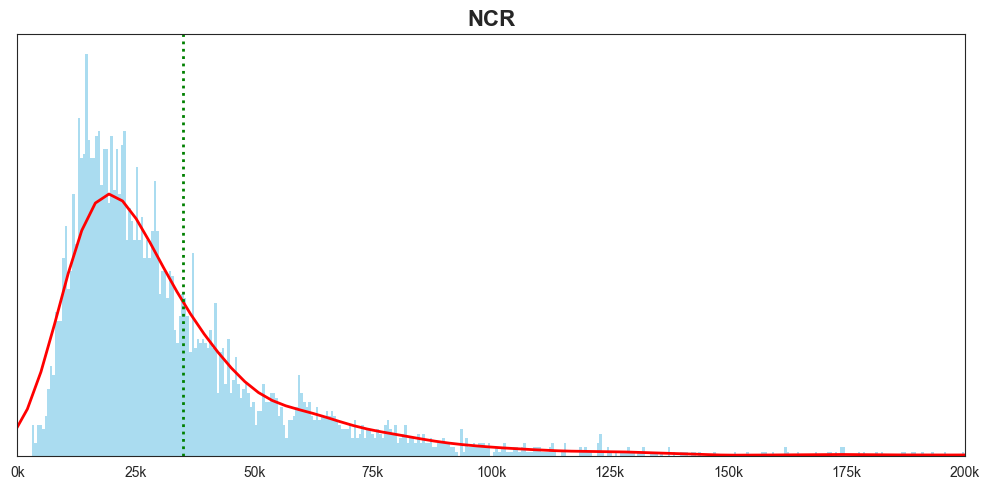

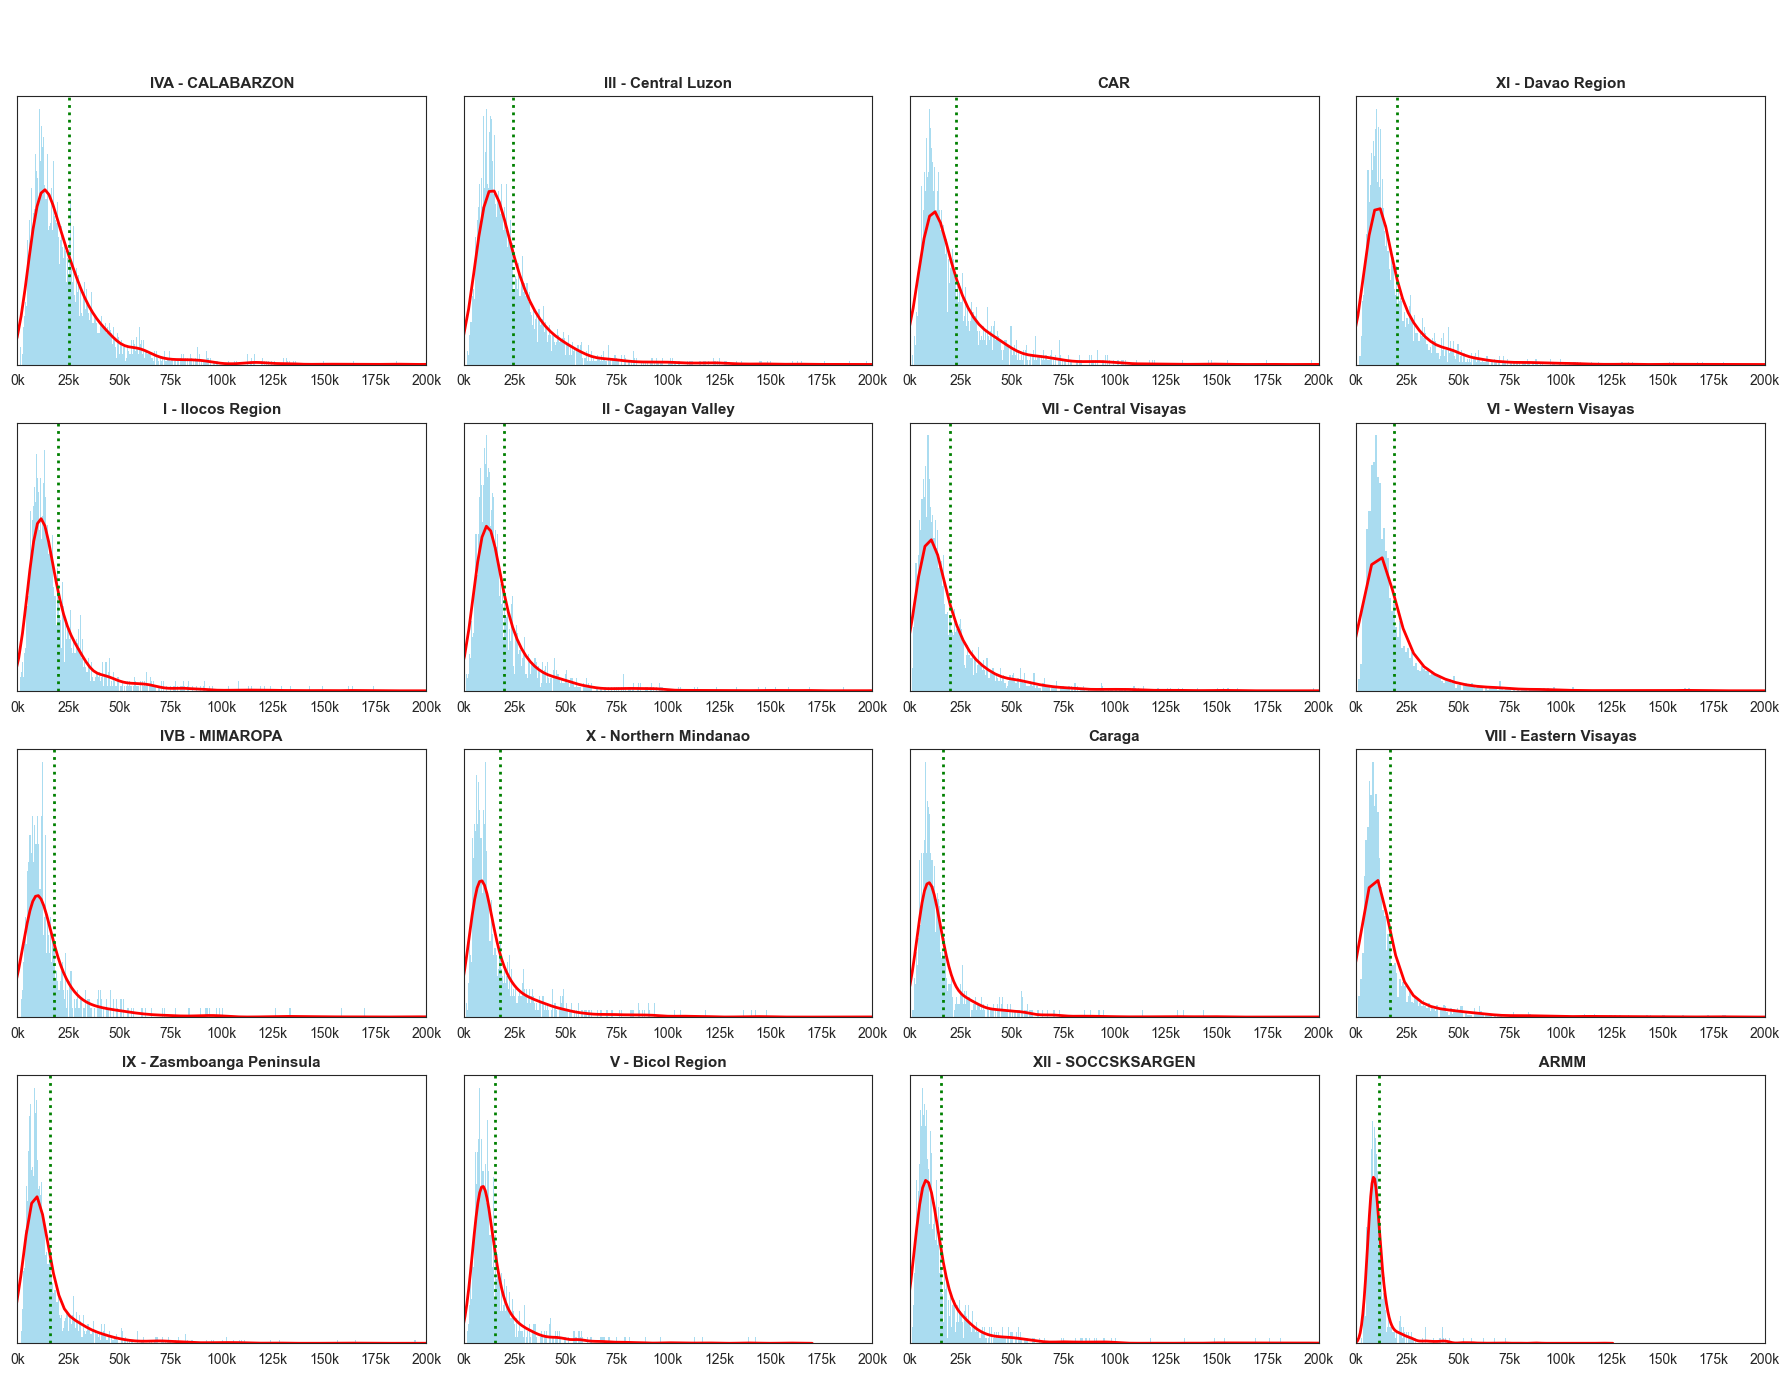

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd

sns.set_style("white")

# Data
regions = income_monthly["Region"].unique()
xlim = (0, 200000)

# X-axis formatter
k_formatter = mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k')


def plot_region(region, ax=None):
    data = income_monthly[income_monthly["Region"] == region]
    sns.histplot(data["Monthly Income"], bins=1000, color="skyblue", edgecolor="none", alpha=0.7, stat='density', ax=ax)
    sns.kdeplot(data["Monthly Income"], color='red', linewidth=2, ax=ax, legend=False)
    mean_income = data["Monthly Income"].mean()
    if ax:
        ax.axvline(mean_income, color="green", linestyle="dotted", linewidth=2)
        ax.set_title(region, fontsize=11, weight="bold")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_yticks([])
        ax.xaxis.set_major_formatter(k_formatter)
        ax.set_xlim(xlim)
        ax.legend([],[], frameon=False)
    else:
        plt.axvline(mean_income, color="green", linestyle="dotted", linewidth=2)
        plt.title(region, fontsize=16, weight="bold")
        plt.xlabel("")
        plt.ylabel("")
        plt.yticks([])
        plt.gca().xaxis.set_major_formatter(k_formatter)
        plt.xlim(xlim)
        plt.legend([],[], frameon=False)


# NCR plot
plt.figure(figsize=(10, 5))
plot_region("NCR")
plt.tight_layout()
plt.show()

# Other regions plot
other_regions = [r for r in regions if r != "NCR"]

# Calculate mean income for each region
region_means = {}
for region in other_regions:
    region_data = income_monthly[income_monthly["Region"] == region]
    region_means[region] = region_data["Monthly Income"].mean()

# Sort regions by mean income in descending order
sorted_regions = sorted(region_means.items(), key=lambda item: item[1], reverse=True)
sorted_regions = [region[0] for region in sorted_regions]  # Extract just the region names

fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for i, region in enumerate(sorted_regions):
    plot_region(region, ax=axes[i])

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(" ", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [6]:
for_matrix = main.select_dtypes(include="number")

In [7]:
selected_columns = [
    "Total Household Income",
    "Total Food Expenditure",
    "Agricultural Household indicator",
    "Bread and Cereals Expenditure",
    "Total Rice Expenditure",
    "Meat Expenditure",
    "Total Fish and  marine products Expenditure",
    "Fruit Expenditure",
    "Vegetables Expenditure",
    "Restaurant and hotels Expenditure",
    "Alcoholic Beverages Expenditure",
    "Tobacco Expenditure",
    "Clothing, Footwear and Other Wear Expenditure",
    "Housing and water Expenditure",
    "Imputed House Rental Value",
    "Medical Care Expenditure",
    "Transportation Expenditure",
    "Communication Expenditure",
    "Education Expenditure",
    "Miscellaneous Goods and Services Expenditure",
    "Special Occasions Expenditure",
    "Crop Farming and Gardening expenses",
    "Total Income from Entrepreneurial Acitivites"
]


In [8]:
matrix = pd.DataFrame(main[selected_columns])

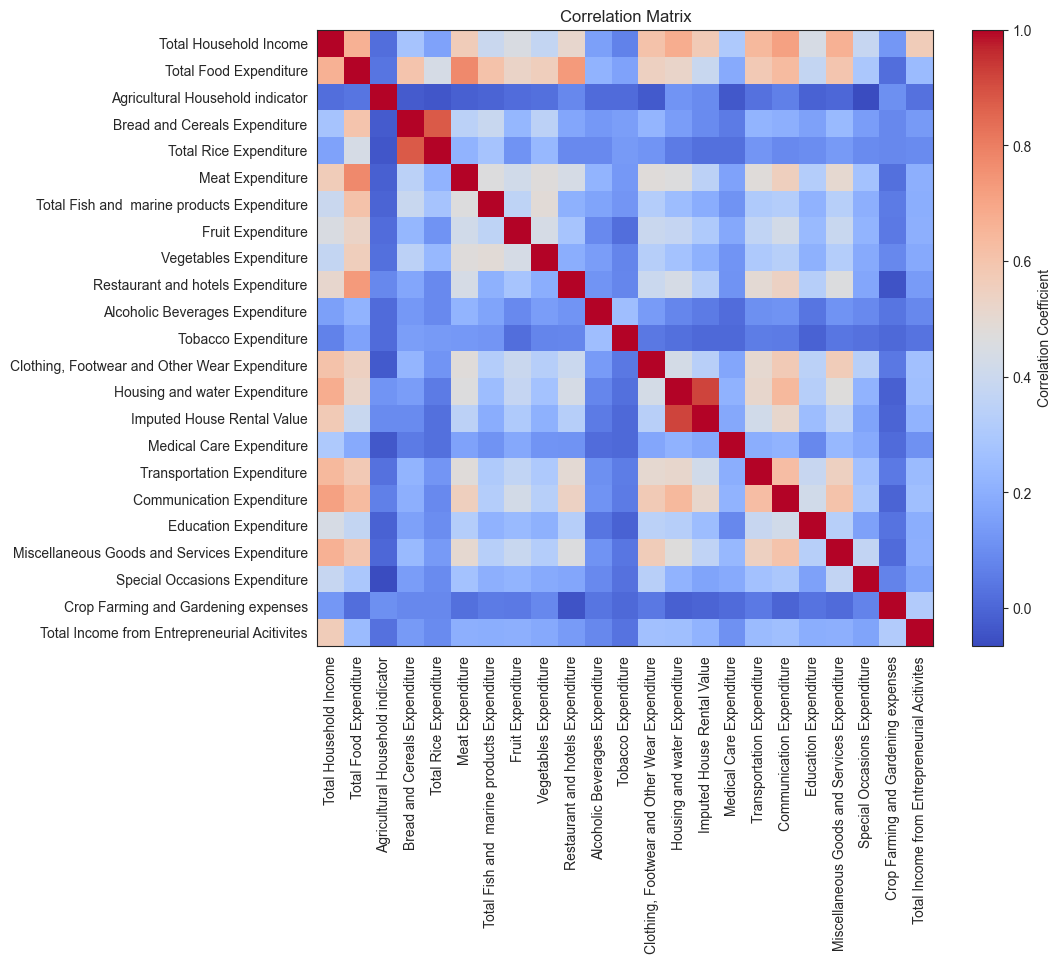

In [9]:
matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr = matrix_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

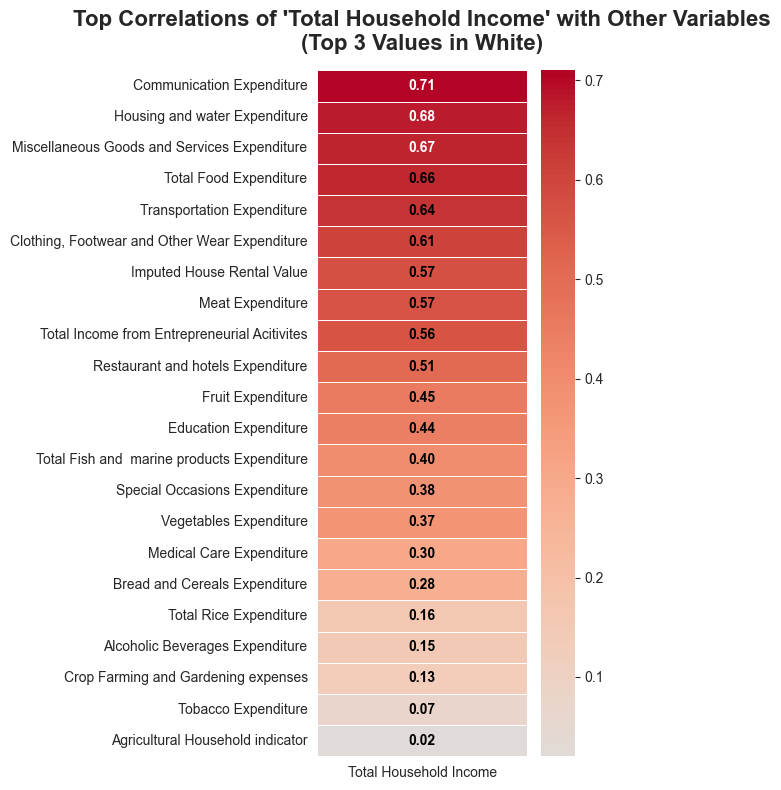

In [10]:
matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = matrix_numeric.corr()

# Get first row, drop self-correlation
first_var = corr_matrix.index[0]
first_row_corr = corr_matrix.iloc[0].drop(first_var)

# Sort values high → low
first_row_corr = first_row_corr.sort_values(ascending=False)
first_row_corr = first_row_corr.to_frame(name=first_var)

# --- Plot as vertical heatmap ---
plt.figure(figsize=(6, 8))
ax = sns.heatmap(
    first_row_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot_kws={"size": 10, "weight": "bold", "color": "black"},
    cbar=True
)

# Change top 3 text colors to white
for i, text in enumerate(ax.texts):
    if i < 3:   # top 3 rows
        text.set_color("white")
    else:
        text.set_color("black")

plt.title(f"Top Correlations of '{first_var}' with Other Variables\n(Top 3 Values in White)", 
          fontsize=16, weight="bold", pad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [11]:
main_source_of_income = pd.DataFrame(main["Main Source of Income"])


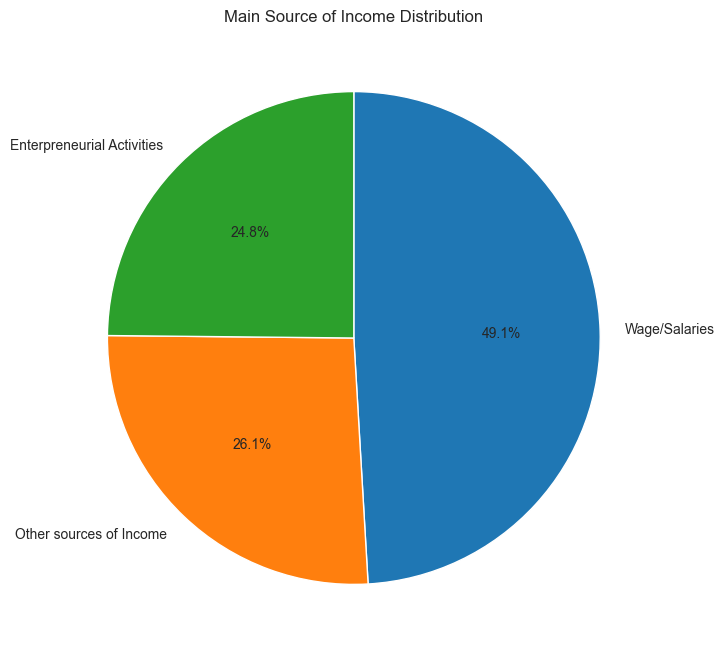

In [12]:


# Count each source of income
income_counts = main_source_of_income["Main Source of Income"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    income_counts, 
    labels=income_counts.index, 
    autopct='%1.1f%%',   # show percentages
    startangle=90,       # rotate start
    counterclock=False   # clockwise
)
plt.title("Main Source of Income Distribution")
plt.show()


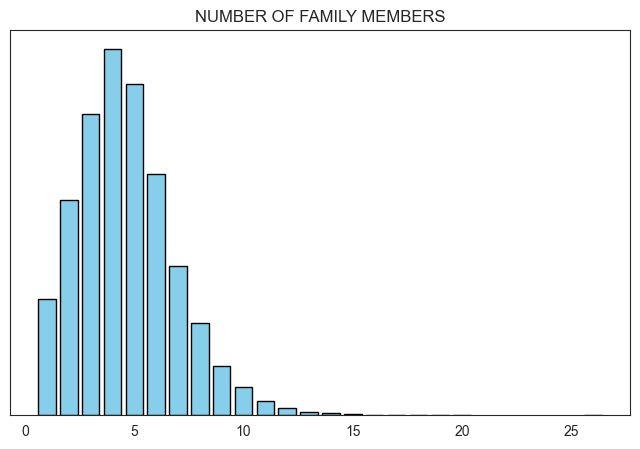

In [13]:
counts = main["Total Number of Family members"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color="skyblue", edgecolor="black")

plt.gca().yaxis.set_visible(False)  # hides entire y-axis
plt.title("NUMBER OF FAMILY MEMBERS")
plt.show()
